We used this one some case

Data load and unzip

In [50]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    os.makedirs(extract_to, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print(f"Unzipped {zip_path} to {extract_to}")


zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/Fitzptrick_17k.zip'
extract_directory = '/content/fitzpatrick17k'
unzip_file(zip_file_path, extract_directory)

Unzipped /content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/Fitzptrick_17k.zip to /content/fitzpatrick17k


In [52]:
import pandas as pd

df_cleaned = pd.read_csv('/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/fitzpatrick17k.csv')

# Remove rows with -1 in 'fitzpatrick_scale' those are unknown sample
# df_cleaned = df_cleaned[df_cleaned['fitzpatrick_scale'] != -1]
df_cleaned.head()

md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  5e82a45bc5d78bd24ae9202d194423f8                  3                    3   
1  fa2911a9b13b6f8af79cb700937cc14f                  1                    1   
2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2                    3   
3  0a94359e7eaacd7178e06b2823777789                  1                    1   
4  a39ec3b1f22c08a421fa20535e037bba                  1                    1   

                             label nine_partition_label three_partition_label  \
0  drug induced pigmentary changes         inflammatory        non-neoplastic   
1                  photodermatoses         inflammatory        non-neoplastic   
2                   dermatofibroma        benign dermal                benign   
3                        psoriasis         inflammatory        non-neoplastic   
4                        psoriasis         inflammatory        non-neoplastic   

    qc                                                url  \
0  NaN  https://www.dermaamin.com/site/images/clinical...   
1  NaN  https://www.dermaamin.com/site/images/clinical...   
2  NaN  https://www.dermaamin.com/site/images/clinical...   
3  NaN  https://www.dermaamin.com/site/images/clinical...   
4  NaN  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...  
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...  
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...  
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...  
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...

Start pre processing

In [53]:
import os
image_dir = '/content/fitzpatrick17k/data/finalfitz17k'

# Create full paths for images
df_cleaned['image_path'] = df_cleaned['md5hash'] + '.jpg'
df_cleaned['image_path'] = df_cleaned['image_path'].apply(lambda x: os.path.join(image_dir, x))

df_cleaned.head()

md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  5e82a45bc5d78bd24ae9202d194423f8                  3                    3   
1  fa2911a9b13b6f8af79cb700937cc14f                  1                    1   
2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2                    3   
3  0a94359e7eaacd7178e06b2823777789                  1                    1   
4  a39ec3b1f22c08a421fa20535e037bba                  1                    1   

                             label nine_partition_label three_partition_label  \
0  drug induced pigmentary changes         inflammatory        non-neoplastic   
1                  photodermatoses         inflammatory        non-neoplastic   
2                   dermatofibroma        benign dermal                benign   
3                        psoriasis         inflammatory        non-neoplastic   
4                        psoriasis         inflammatory        non-neoplastic   

    qc                                                url  \
0  NaN  https://www.dermaamin.com/site/images/clinical...   
1  NaN  https://www.dermaamin.com/site/images/clinical...   
2  NaN  https://www.dermaamin.com/site/images/clinical...   
3  NaN  https://www.dermaamin.com/site/images/clinical...   
4  NaN  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  \
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...   
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...   
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...   
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...   
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...   

                                          image_path  
0  /content/fitzpatrick17k/data/finalfitz17k/5e82...  
1  /content/fitzpatrick17k/data/finalfitz17k/fa29...  
2  /content/fitzpatrick17k/data/finalfitz17k/d2ba...  
3  /content/fitzpatrick17k/data/finalfitz17k/0a94...  
4  /content/fitzpatrick17k/data/finalfitz17k/a39e...

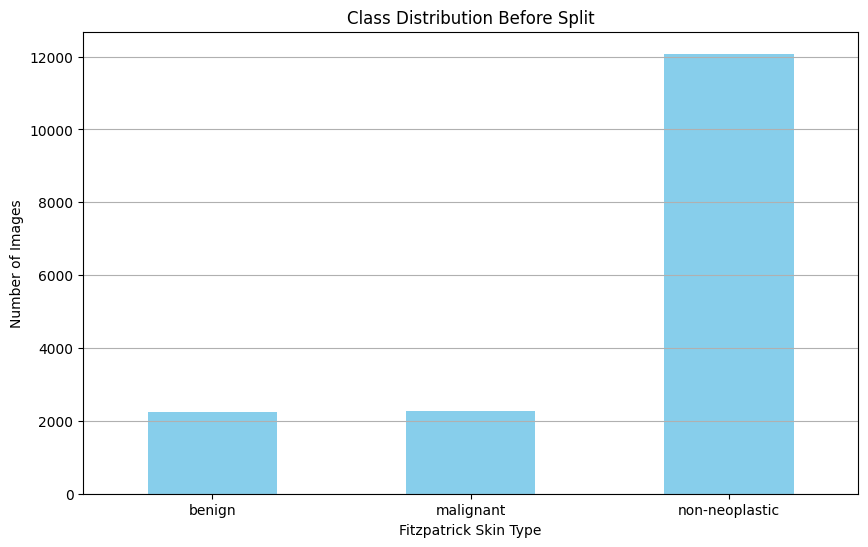

In [54]:
import matplotlib.pyplot as plt

skin_type_counts = df_cleaned['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before Split')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(skin_type_counts.index)), labels=skin_type_counts.index, rotation=0)
plt.grid(axis='y')
plt.show()


In [55]:
from PIL import Image
import os
import zipfile

input_image_dir = '/content/fitzpatrick17k/data/finalfitz17k'
output_image_dir = '/content/resized_images'
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/resized_images.zip'

# Function to resize images
def resize_images(input_dir, output_dir, new_size):
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.jpg'):
            try:
                img_path = os.path.join(input_dir, file_name)
                img = Image.open(img_path)
                img = img.resize(new_size, Image.ANTIALIAS)
                resized_path = os.path.join(output_dir, file_name)
                img.save(resized_path)

            except Exception as e:
                print(f'Error processing {file_name}: {e}')

# Function to zip images
def zip_images(output_dir, zip_path):
    with zipfile.ZipFile(zip_path, 'w') as zipf:
        for root, _, files in os.walk(output_dir):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_dir))

# Check if the zip file exists on Google Drive
if os.path.exists(zip_file_path):
    print("Zip file found on Google Drive. Extracting...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_image_dir)
    print("Images extracted from zip file.")
else:
    print("Zip file not found. Resizing images...")
    os.makedirs(output_image_dir, exist_ok=True)
    new_size = (224, 224)

    resize_images(input_image_dir, output_image_dir, new_size)

    print("Image resizing completed.")

    print("Zipping resized images...")
    zip_images(output_image_dir, zip_file_path)
    print(f"Resized images zipped and saved to Google Drive: {zip_file_path}")


Zip file found on Google Drive. Extracting...
Images extracted from zip file.


In [56]:
image_dir = '/content/resized_images'

df_cleaned['resized_image_path'] = df_cleaned['md5hash'] + '.jpg'
df_cleaned['resized_image_path'] = df_cleaned['resized_image_path'].apply(lambda x: os.path.join(image_dir, x))
df_cleaned.head()

md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  5e82a45bc5d78bd24ae9202d194423f8                  3                    3   
1  fa2911a9b13b6f8af79cb700937cc14f                  1                    1   
2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2                    3   
3  0a94359e7eaacd7178e06b2823777789                  1                    1   
4  a39ec3b1f22c08a421fa20535e037bba                  1                    1   

                             label nine_partition_label three_partition_label  \
0  drug induced pigmentary changes         inflammatory        non-neoplastic   
1                  photodermatoses         inflammatory        non-neoplastic   
2                   dermatofibroma        benign dermal                benign   
3                        psoriasis         inflammatory        non-neoplastic   
4                        psoriasis         inflammatory        non-neoplastic   

    qc                                                url  \
0  NaN  https://www.dermaamin.com/site/images/clinical...   
1  NaN  https://www.dermaamin.com/site/images/clinical...   
2  NaN  https://www.dermaamin.com/site/images/clinical...   
3  NaN  https://www.dermaamin.com/site/images/clinical...   
4  NaN  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  \
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...   
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...   
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...   
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...   
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...   

                                          image_path  \
0  /content/fitzpatrick17k/data/finalfitz17k/5e82...   
1  /content/fitzpatrick17k/data/finalfitz17k/fa29...   
2  /content/fitzpatrick17k/data/finalfitz17k/d2ba...   
3  /content/fitzpatrick17k/data/finalfitz17k/0a94...   
4  /content/fitzpatrick17k/data/finalfitz17k/a39e...   

                                  resized_image_path  
0  /content/resized_images/5e82a45bc5d78bd24ae920...  
1  /content/resized_images/fa2911a9b13b6f8af79cb7...  
2  /content/resized_images/d2bac3c9e4499032ca8e9b...  
3  /content/resized_images/0a94359e7eaacd7178e06b...  
4  /content/resized_images/a39ec3b1f22c08a421fa20...

In [57]:
df_cleaned['three_partition_label'].value_counts().sort_index()

three_partition_label
benign             2234
malignant          2263
non-neoplastic    12080
Name: count, dtype: int64

In [58]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Directories
augmented_dir = '/content/augmented_images'
# If you don't need to create this directory, you can comment out the following line
os.makedirs(augmented_dir, exist_ok=True)

# Data
X = df_cleaned['resized_image_path'].values
y = df_cleaned['three_partition_label'].values

# Label Encoding
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# Print the class mapping
# print("Class mapping:")
# for index, class_label in enumerate(label_encoder.classes_):
#     print(f"{index}: {class_label}")

# Encode the original labels using the same encoder
# df_cleaned['three_partition_label'] = label_encoder.transform(df_cleaned['three_partition_label'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Create DataFrames for training and testing sets
df_train = pd.DataFrame({'resized_image_path': X_train, 'three_partition_label': y_train})
df_test = pd.DataFrame({'resized_image_path': X_test, 'three_partition_label': y_test})

# Save training and testing data to CSV
df_train.to_csv('/content/train_data.csv', index=False)
df_test.to_csv('/content/test_data.csv', index=False)

# Print the count of samples per class in the training set
train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
print(train_skin_type_counts)


three_partition_label
benign            1787
malignant         1810
non-neoplastic    9664
Name: count, dtype: int64


In [59]:
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()
print(test_skin_type_counts)

three_partition_label
benign             447
malignant          453
non-neoplastic    2416
Name: count, dtype: int64


In [60]:
df_test

resized_image_path three_partition_label
0     /content/resized_images/b6f9c924bb3b864c03ecfa...        non-neoplastic
1     /content/resized_images/3e96f0e6bdf82fe4ee5d76...                benign
2     /content/resized_images/abf70b58e93e881fdad456...                benign
3     /content/resized_images/e789130a814619c1773eef...             malignant
4     /content/resized_images/60c20c7458e1a508b96bd1...             malignant
...                                                 ...                   ...
3311  /content/resized_images/222f1b057b0f6a0575a2b9...        non-neoplastic
3312  /content/resized_images/32d2a131a10a9c2cd9f69d...        non-neoplastic
3313  /content/resized_images/021be051ebe558ea89ee25...                benign
3314  /content/resized_images/496b1cf6569af308995ffe...        non-neoplastic
3315  /content/resized_images/4b263fd639d437aede5170...        non-neoplastic

[3316 rows x 2 columns]

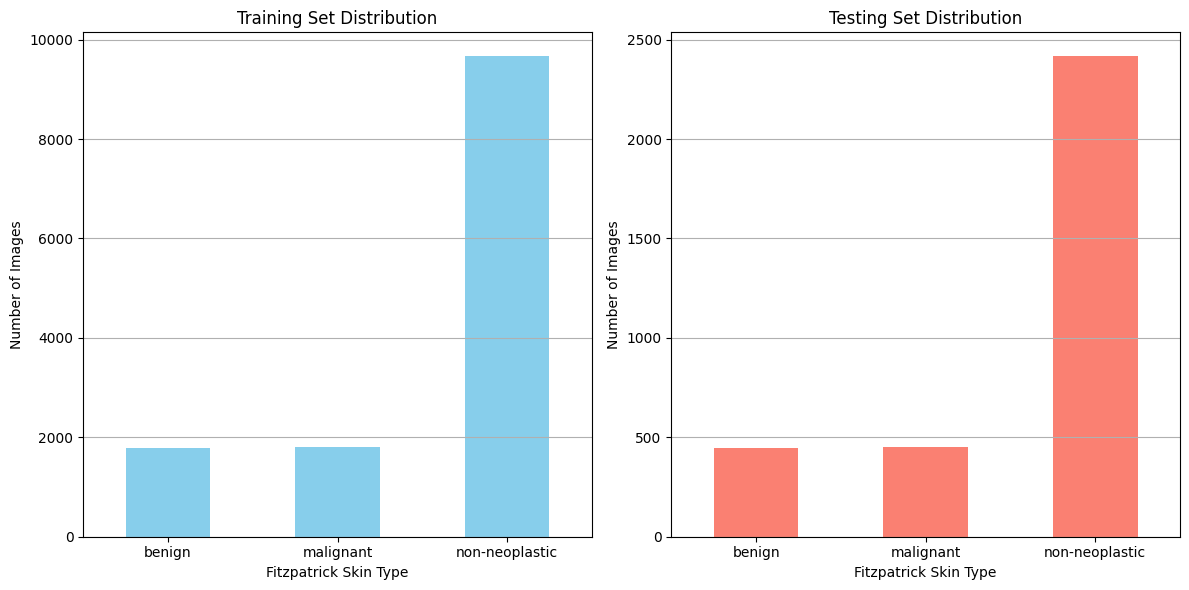

In [61]:

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


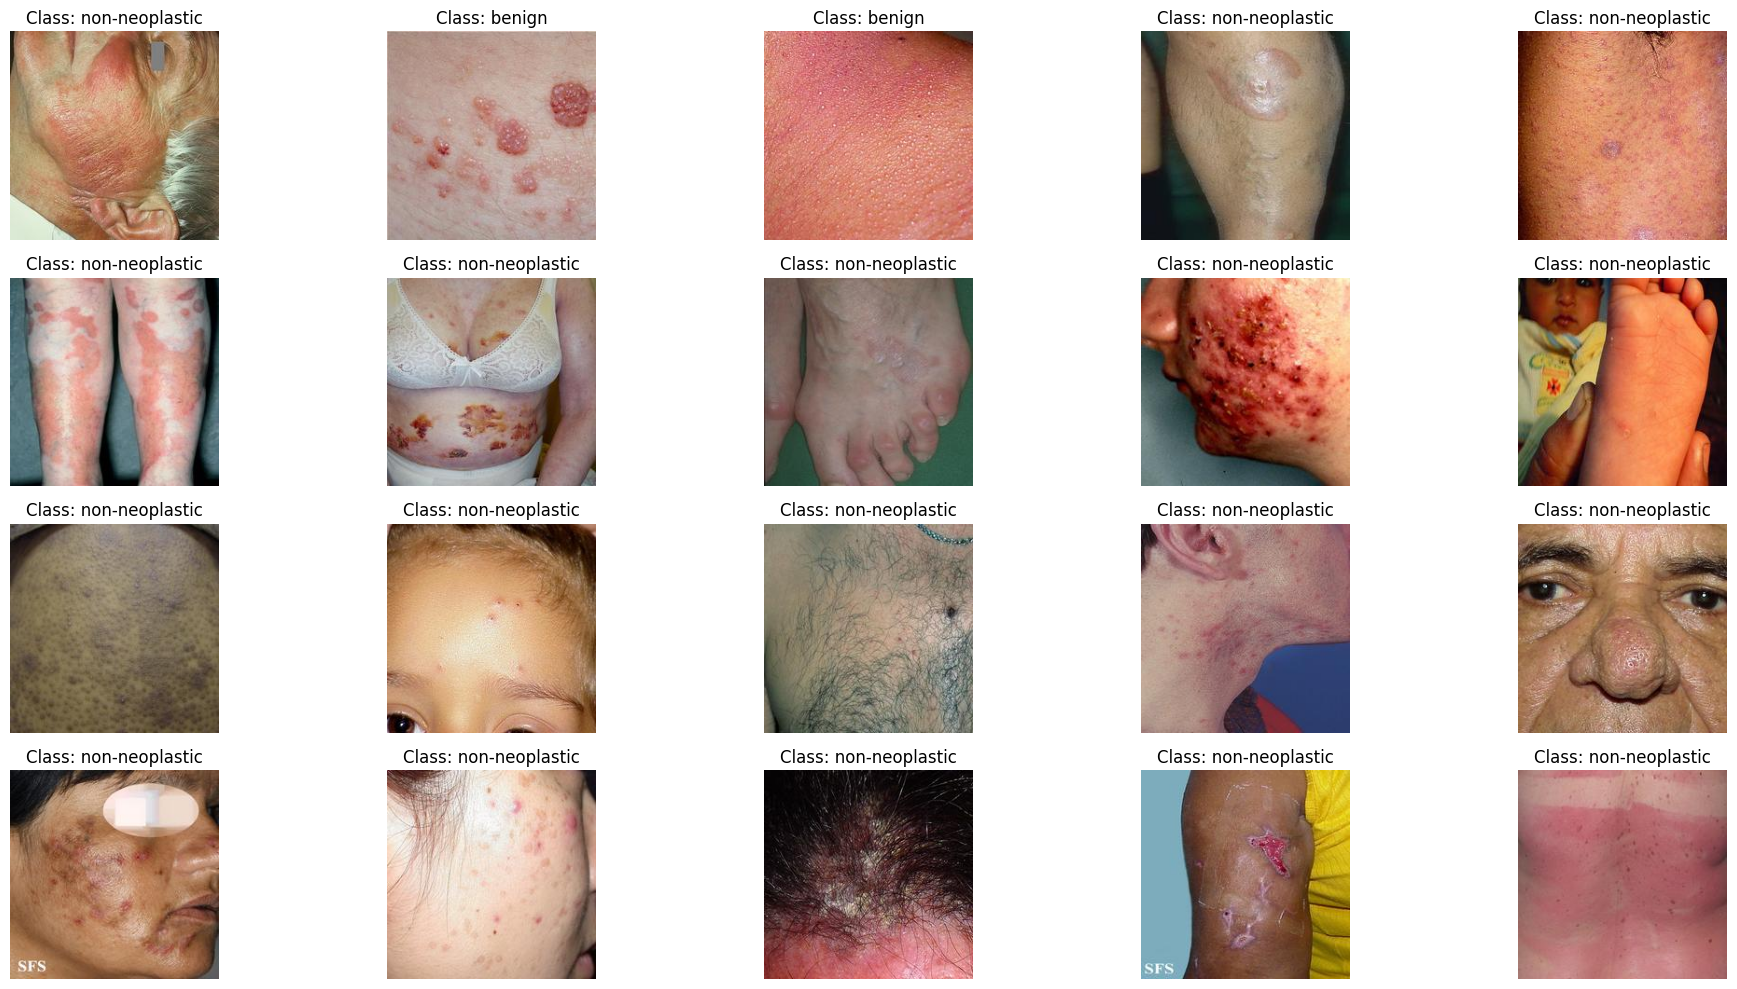

In [62]:
import matplotlib.pyplot as plt
sample = df_train.tail(20)

plt.figure(figsize=(20, 10))

for i, row in enumerate(sample.itertuples(), start=1):
    image_path = row.resized_image_path
    image = Image.open(image_path)

    plt.subplot(4, 5, i)
    plt.imshow(image)
    plt.title(f"Class: {row.three_partition_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [63]:
df_train

resized_image_path three_partition_label
0      /content/resized_images/96e320998184af49bfc791...             malignant
1      /content/resized_images/3b76144cda29793ac4bb70...        non-neoplastic
2      /content/resized_images/da81b0441ab66a8c3f5548...             malignant
3      /content/resized_images/72430e826363a44a2f9d5d...             malignant
4      /content/resized_images/860590217a382b642fe975...        non-neoplastic
...                                                  ...                   ...
13256  /content/resized_images/854a56f48cd7fba0d367ec...        non-neoplastic
13257  /content/resized_images/fa6ab29241f0d3129793b7...        non-neoplastic
13258  /content/resized_images/c01937f15b84d142876597...        non-neoplastic
13259  /content/resized_images/af3817274649e2e31883bb...        non-neoplastic
13260  /content/resized_images/4e82c2fd5dbfbdc33b34ed...        non-neoplastic

[13261 rows x 2 columns]

# checking test sets | this are test sets from orginal

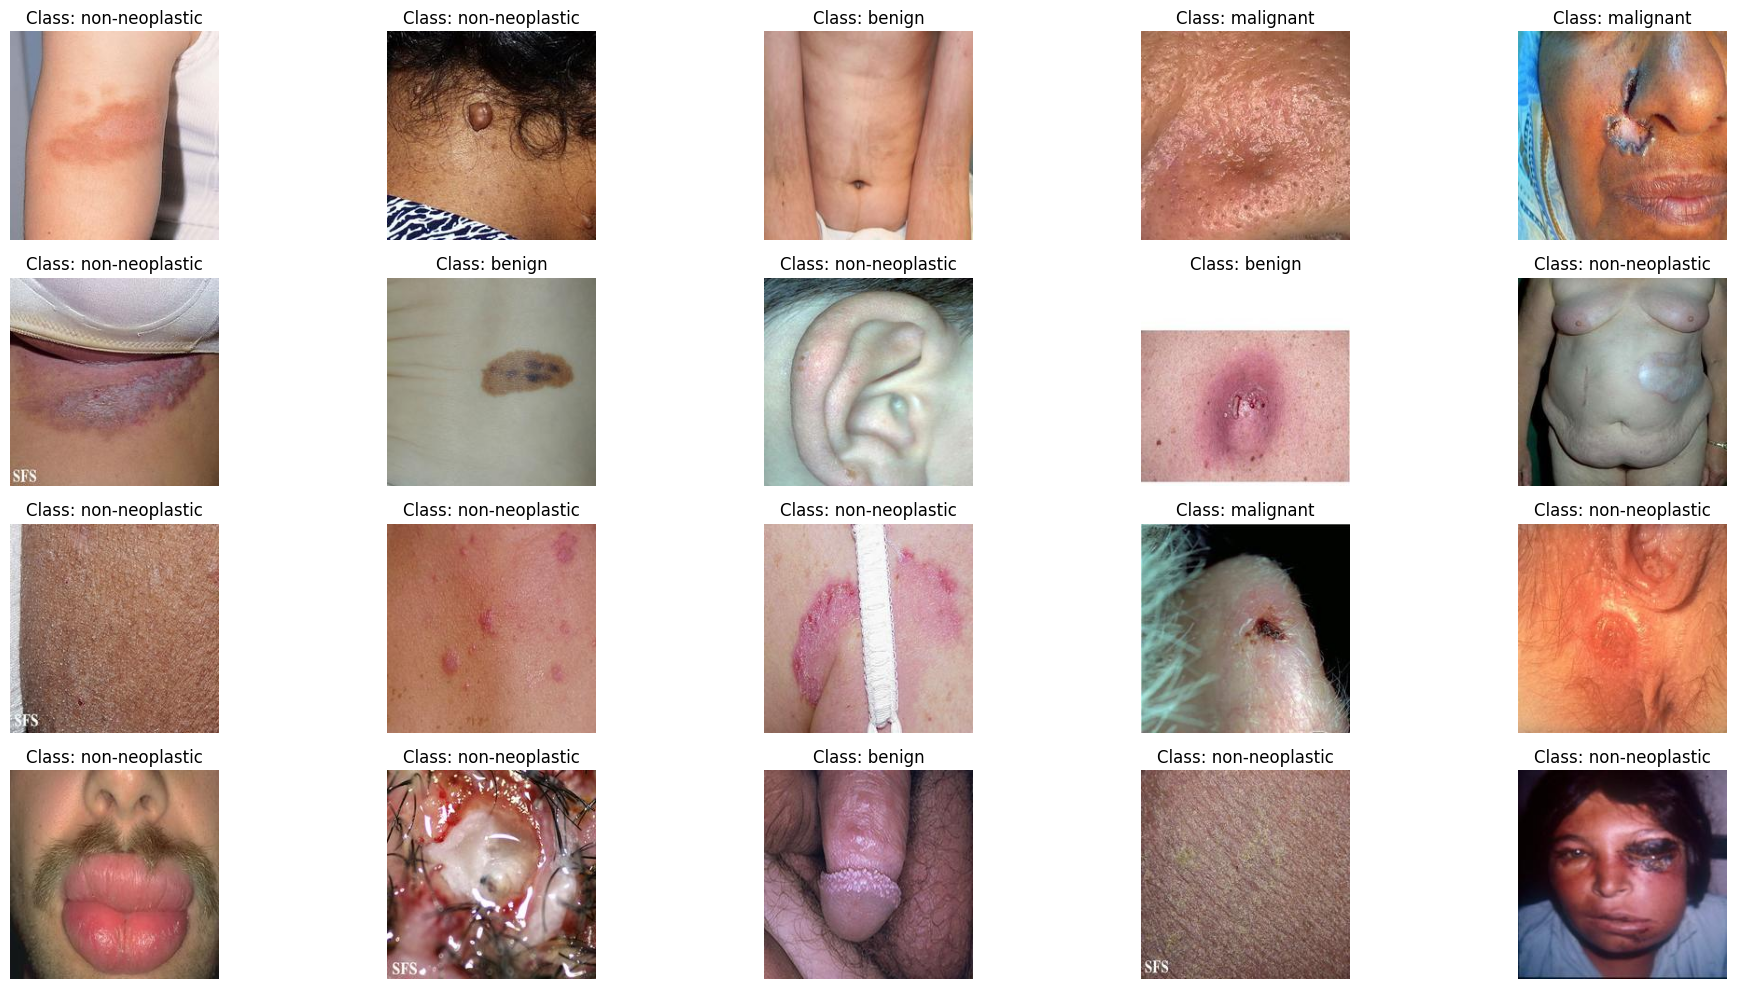

In [64]:
import matplotlib.pyplot as plt

# Display the first 20 augmented images
sample = df_test.tail(20)

plt.figure(figsize=(20, 10))

for i, row in enumerate(sample.itertuples(), start=1):
    image_path = row.resized_image_path
    image = Image.open(image_path)

    plt.subplot(4, 5, i)
    plt.imshow(image)
    plt.title(f"Class: {row.three_partition_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()



In [65]:
df_test

resized_image_path three_partition_label
0     /content/resized_images/b6f9c924bb3b864c03ecfa...        non-neoplastic
1     /content/resized_images/3e96f0e6bdf82fe4ee5d76...                benign
2     /content/resized_images/abf70b58e93e881fdad456...                benign
3     /content/resized_images/e789130a814619c1773eef...             malignant
4     /content/resized_images/60c20c7458e1a508b96bd1...             malignant
...                                                 ...                   ...
3311  /content/resized_images/222f1b057b0f6a0575a2b9...        non-neoplastic
3312  /content/resized_images/32d2a131a10a9c2cd9f69d...        non-neoplastic
3313  /content/resized_images/021be051ebe558ea89ee25...                benign
3314  /content/resized_images/496b1cf6569af308995ffe...        non-neoplastic
3315  /content/resized_images/4b263fd639d437aede5170...        non-neoplastic

[3316 rows x 2 columns]

In [66]:
import os
import pandas as pd
from sklearn.utils import shuffle
from zipfile import ZipFile
import albumentations as A
import cv2
import shutil

# Directories
all_images_dir = '/content/all_images'
os.makedirs(all_images_dir, exist_ok=True)

# Define your augmentation logic using Albumentations
def augment_dataframe(df, target_size, class_label):
    augmentations = A.Compose([
        A.RandomRotate90(),
        A.HorizontalFlip(),
        A.VerticalFlip(),
        A.RandomBrightnessContrast(),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=15),
    ])

    augmented_images = []
    for i in range(target_size):
        # Load the image
        image_path = df['resized_image_path'].values[i % len(df)]
        image = cv2.imread(image_path)

        # Apply augmentation
        augmented = augmentations(image=image)['image']

        # Save augmented image to the directory
        augmented_image_path = os.path.join(all_images_dir, f"{class_label}_aug_{i}.jpg")
        cv2.imwrite(augmented_image_path, augmented)

        augmented_images.append((augmented_image_path, class_label, 'train'))  # Append augmented image details

    return augmented_images

# Augment two smallest classes in the training set
class_counts = df_train['three_partition_label'].value_counts().sort_index()
classes_to_augment = class_counts.nsmallest(2).index.tolist()

df_augment_class1 = df_train[df_train['three_partition_label'] == classes_to_augment[0]]
df_augment_class2 = df_train[df_train['three_partition_label'] == classes_to_augment[1]]

# Augment the two classes to the desired sizes (adjust according to your requirement)
augmented_class1 = augment_dataframe(df_augment_class1, 6532, classes_to_augment[0])
augmented_class2 = augment_dataframe(df_augment_class2, 6764, classes_to_augment[1])

# Store original train and test images in all_images_dir and prepare metadata
all_image_metadata = []

# Add train set images to all_images_dir
for index, row in df_train.iterrows():
    image_path = row['resized_image_path']
    class_label = row['three_partition_label']
    destination_path = os.path.join(all_images_dir, os.path.basename(image_path))
    shutil.copy(image_path, destination_path)
    all_image_metadata.append((destination_path, class_label, 'train'))

# Add test set images to all_images_dir
for index, row in df_test.iterrows():
    image_path = row['resized_image_path']
    class_label = row['three_partition_label']
    destination_path = os.path.join(all_images_dir, os.path.basename(image_path))
    shutil.copy(image_path, destination_path)
    all_image_metadata.append((destination_path, class_label, 'test'))

# Add augmented images metadata
all_image_metadata.extend(augmented_class1)
all_image_metadata.extend(augmented_class2)

# Convert metadata to DataFrame
df_all_images = pd.DataFrame(all_image_metadata, columns=['resized_image_path', 'three_partition_label', 'set'])

# Save the DataFrame
df_all_images.to_csv('/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/image_metadata_trainAug_testNonAuh.csv', index=False)

# Zip the folder with all images
with ZipFile('/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/all_images_trainAug_testNonAuh.zip', 'w') as zipf:
    for foldername, subfolders, filenames in os.walk(all_images_dir):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zipf.write(file_path, os.path.basename(file_path))

print("Augmentation, zipping, and metadata saving completed.")


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Augmentation, zipping, and metadata saving completed.


# Now How can we load our pre processed data easily and start model train

In [47]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/all_images_trainAug_testNonAuh.zip'
unzip_dir = '/content/all_images'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/image_metadata_trainAug_testNonAuh.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Train set class distribution:
three_partition_label
non-neoplastic    9353
malignant         8492
benign            8260
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    2339
benign             432
malignant          432
Name: count, dtype: int64
                                      resized_image_path  \
12809  /content/all_images/54e35ddd9a4969f4f82400e978...   
12810  /content/all_images/80865459bcbf7e9528f8365380...   
12811  /content/all_images/bf0ac1fa54c864abb0672fd6ba...   
12812  /content/all_images/9ca9d8e0946f6d8598daad6770...   
12813  /content/all_images/fe95127aa67f455fb965e42e6c...   

      three_partition_label   set  
12809        non-neoplastic  test  
12810        non-neoplastic  test  
12811                benign  test  
12812             malignant  test  
12813        non-neoplastic  test  


resized_image_path three_partition_label  \
0  /content/all_images/ae0e4130d0a4c7392840533ab5...        non-neoplastic   
1  /content/all_images/a25020ca87984d5b92101d1379...        non-neoplastic   
2  /content/all_images/b642e3c2227b664fe5d3f8dde9...                benign   
3  /content/all_images/65a6bdc05d3e5f49d5c64fefd8...        non-neoplastic   
4  /content/all_images/3b9bd3e9eb966555a82388a453...                benign   

     set  
0  train  
1  train  
2  train  
3  train  
4  train

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Load your data and initialize the LabelEncoder
df_all_images = pd.read_csv(metadata_csv_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
df_val, df_train = train_test_split(df_train, test_size=0.25, stratify=df_train['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    9353
1    8492
0    8260
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    2339
0     432
1     432
Name: count, dtype: int64
Found 6527 validated image filenames belonging to 3 classes.
Found 19578 validated image filenames belonging to 3 classes.
Found 3203 validated image filenames belonging to 3 classes.
